# Data Visualizations

This training module was developed by Dr. Kyle R. Roell, Lauren E. Koval, Dr. Julia E. Rager, and Alexis Payton

Spring 2023


## Introduction to Training Module
Visualizing data is an important step in any data analysis within environmental health research. Often, visualizations allow scientists to better understand trends and patterns within a particular dataset under evaluation. Even after statistical analysis of a dataset, it is important to then communicate these findings to a wide variety of target audiences. Visualizations are a vital part of communicating complex data and results to target audiences.

There are many ways to visualize data, from simple scatter plots to more complicated heat maps. The previous training module included some example visualization methods while evaluating basic trends in environmental health datasets. Here, we expand upon these methods by highlighting some that can be used to visualize larger, more high-dimensional datasets. This training module specifically reviews the formatting of data in preparation of generating visualizations, scaling datasets, and then guides users through the generation of the following example data visualizations:

+ Density plots
+ GGally plots
+ Boxplots
+ Correlation plots
+ Hierarchical clustering
+ Heat maps

These visualization approaches are demonstrated using a large environmental chemistry dataset. This example dataset was generated through chemical speciation analysis of smoke samples collected during lab-based simulations of wildfire events. Specifically, different biomass materials (eucalyptus, peat, pine, pine needles, and red oak) were burned under two combustion conditions of flaming and smoldering, resulting in the generation of 12 different smoke samples. These data have been previously published in the following example environmental health research studies, with data made publicly available:

+ Rager JE, Clark J, Eaves LA, Avula V, Niehoff NM, Kim YH, Jaspers I, Gilmour MI. Mixtures modeling identifies chemical inducers versus repressors of toxicity associated with wildfire smoke. Sci Total Environ. 2021 Jun 25;775:145759. doi: 10.1016/j.scitotenv.2021.145759. Epub 2021 Feb 10. PMID: [33611182](https://pubmed.ncbi.nlm.nih.gov/33611182/).
+ Kim YH, Warren SH, Krantz QT, King C, Jaskot R, Preston WT, George BJ, Hays MD, Landis MS, Higuchi M, DeMarini DM, Gilmour MI. Mutagenicity and Lung Toxicity of Smoldering vs. Flaming Emissions from Various Biomass Fuels: Implications for Health Effects from Wildland Fires. Environ Health Perspect. 2018 Jan 24;126(1):017011. doi: 10.1289/EHP2200. PMID: [29373863](https://pubmed.ncbi.nlm.nih.gov/29373863/).

### Script Preparations

#### Cleaning the global environment

In [2]:
rm(list=ls())

#### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [10]:
if (!requireNamespace("GGally"))
  install.packages("GGally");
if (!requireNamespace("superheat"))
  install.packages("superheat");
if (!requireNamespace("pheatmap"))
  install.packages("pheatmap");
if (!requireNamespace("viridis"))
  install.packages("viridis");

Loading required namespace: superheat

also installing the dependency ‘ggdendro’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required namespace: pheatmap

Loading required namespace: viridis



#### Loading R packages required for this session

In [11]:
library(ggplot2);
library(GGally);
library(superheat);
library(pheatmap);
library(corrplot);
library(reshape2);
library(viridis);

corrplot 0.92 loaded

Loading required package: viridisLite



#### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

#### Importing example dataset
Then let's read in our example dataset. As mentioned in the introduction, this example dataset represents chemical measurements across 12 different biomass burn scenarios, representing potential wildfire events. Let's upload and view these data:

In [3]:
# Load the data
SmokeData1 <- read.csv("Module3_2/Module3_2_DataforVisualizations.csv")

# View the top of the dataset
head(SmokeData1) 

,Chemical.Category,Chemical,CASRN,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69,ng_per_uL


#### Formatting dataframes for downstream visualization code

For some of the visualizations below (e.g., heat maps) we'll use data from the original full dataframe. The only formatting that needs to be done to this dataframe is to move the chemical names to the row names position of the dataframe:

In [4]:
rownames(SmokeData1) <- SmokeData1$Chemical

# View the top of the reorganized dataset
head(SmokeData1) 

,Chemical.Category,Chemical,CASRN,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2-Methylnonadecane,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13,ng_per_uL
3-Methylnonadecane,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77,ng_per_uL
Docosane,n-Alkanes,Docosane,629-97-0,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36,ng_per_uL
Dodecylcyclohexane,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04,ng_per_uL
Eicosane,n-Alkanes,Eicosane,112-95-8,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38,ng_per_uL
Heneicosane,n-Alkanes,Heneicosane,629-94-7,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69,ng_per_uL


For most other visualizations below, we'll need a separate dataframe that just contains the chemical concentration columns (specifically columns 4 through 13 from the above view). Let's create this **separate dataframe** and call it **SmokeData2**.  

First, we'll pull the chemical concentration values from columns 4 through 13. While we pull these values, let's also check that they are recognized as numeric values using the 'apply' function. Here, we run the apply function across columns 4 through 13 (`SmokeData[,4:13]`) by columns (indicated by the number 2; if we wanted this by rows we would use the number 1), and coerce all values to numeric using the `as.numeric` function.

In [5]:
SmokeData2 <- apply(SmokeData1[,4:13], 2, as.numeric)

# View the top of this new dataframe
head(SmokeData2) 

Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming
0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13
0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77
0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36
0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04
0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38
0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69


For more information on the apply function, see its [RDocumentation](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/apply) and a helpful [tutorial on the R apply family of functions](https://www.datacamp.com/community/tutorials/r-tutorial-apply-family).

Let's now add back in the chemical identifiers, by grabbing the row names from the original dataframe, SmokeData1.

In [6]:
rownames(SmokeData2) <- rownames(SmokeData1)

# View the top of this dataframe
head(SmokeData2) 

,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming
2-Methylnonadecane,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13
3-Methylnonadecane,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77
Docosane,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36
Dodecylcyclohexane,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04
Eicosane,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38
Heneicosane,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69


#### Scaling dataframes for downstream data visualizations

A data preparation method that is commonly used to convert values into those that can be used to better illustrate overall data trends is **data scaling**. Scaling can be achieved through data transformations or normalization procedures, depending on the specific dataset and goal of analysis/visualization. Scaling is often carried out using data vectors or columns of a dataframe.

For this example, we will normalize the chemical concentration dataset using a basic scaling and centering procedure using the base R function, `scale`. This algorithm results in the normalization of a dataset using the mean value and standard deviation. This scaling step will convert chemical concentration values in our dataset into normalized values across samples, such that each chemical's concentration distributions are more easily comparable between the different biomass burn conditions.

For more information on the 'scale' function, see its associated [RDocumentation](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/scale) and helpful tutorial on [Implementing the scale() function in R](https://www.journaldev.com/47818/r-scale-function).
  
Let's make a new dataframe (**ScaledData**) based off scaled values of the data within the SmokeData2 dataframe:

In [7]:
# Scale the data across chemicals. Note that we have to first transform the 
# dataframe ('t') since the scale function operates by column 
# (and the chemicals are listed by rows). We also convert the dataframe back to 
# its original format with chemicals along the rows and biomass burn conditions 
# along the columns by using ('t') again after scaling the data.
ScaledData <- t(scale(t(SmokeData2)))

# Grabbing the rownames
rownames(ScaledData) <- rownames(SmokeData2) 

# Viewing the top two rows of this new dataframe
head(ScaledData,2) 

,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming
2-Methylnonadecane,-0.3347765,-0.3347765,2.841935,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.1637228
3-Methylnonadecane,-0.8794448,-0.8794448,1.649829,1.1161291,0.1183422,-0.8794448,-0.8794448,0.6984509,-0.8794448,0.8144726


We can see that each chemical is now scaled, centered around 0, with values distributed that are less than zero, and others that are greater than zero, based off a normal distribution.


Let's also create a melted (or long) dataframe and save it as **ScaledData.melt**:

In [12]:
ScaledData.melt <- melt(ScaledData)
colnames(ScaledData.melt) <- c("Chemical", "Biomass_Burn_Condition", 
                               "Scaled_Chemical_Concentration") #updating the column names
ScaledData.melt[1:10,]

,Chemical,Biomass_Burn_Condition,Scaled_Chemical_Concentration
,<fct>,<fct>,<dbl>
1,2-Methylnonadecane,Eucalyptus_Smoldering,-0.3347765
2,3-Methylnonadecane,Eucalyptus_Smoldering,-0.8794448
3,Docosane,Eucalyptus_Smoldering,-0.3465132
4,Dodecylcyclohexane,Eucalyptus_Smoldering,-0.4240624
5,Eicosane,Eucalyptus_Smoldering,-0.3802202
6,Heneicosane,Eucalyptus_Smoldering,-0.3895328
7,Hentriacontane,Eucalyptus_Smoldering,0.1304235
8,Heptacosane,Eucalyptus_Smoldering,0.1291155
9,Heptadecane,Eucalyptus_Smoldering,-0.3759424


Now we have all the dataframes we need, formatted and ready to go for visualizations!

## Data Visualizations
## Density Plot Visualizations

Density plots are an effective way to show overall distributions of data and can be useful to compare across various test conditions or other stratifications of the data under evaluation.

Here, we use ggplot to create density plots, displaying trends in chemical concentrations across the tested biomass burn conditions. We run use the `ggplot` function to dispaly the scaled chemistry data to yield the following plot:

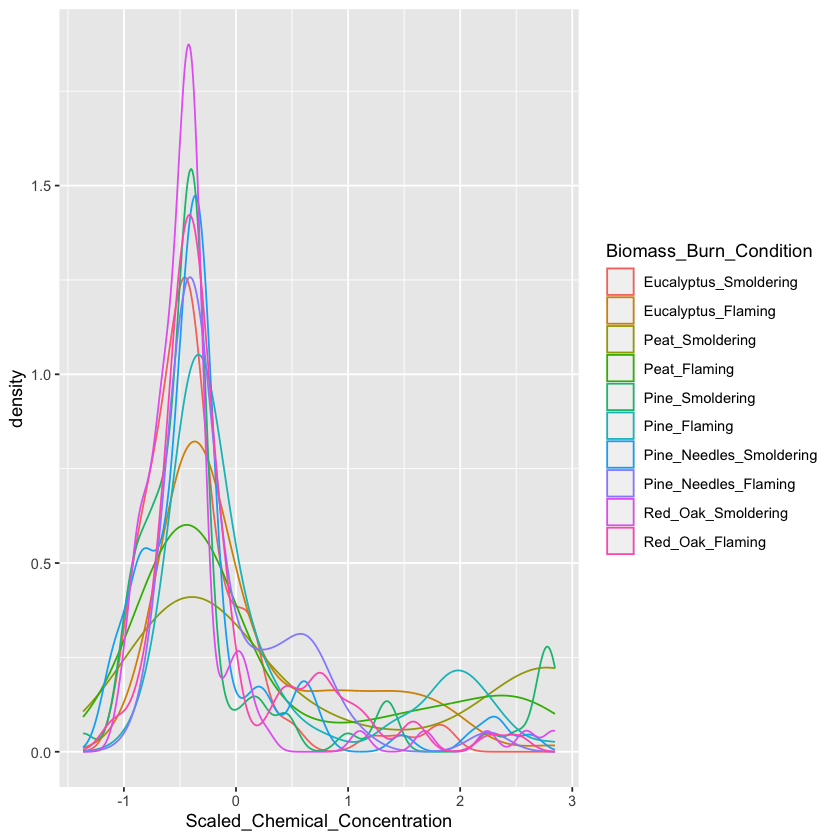

In [13]:
ggplot(ScaledData.melt, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_density()

Here are some interesting takeaways from viewing this density plot:
+ In general, there are a high number of chemicals that were measured at relatively lower abundances (hence, the peak in occurrence density occurring towards the left, before 0)
+ The three conditions of smoldering peat, flaming peat, and flaming pine contained the most chemicals at the highest relative concentrations (hence, these lines are the top three lines towards the right)



## GGally Visualizations

GGally is a package that serves as an extension of `ggplot2`, the baseline R plotting system based on the grammer of graphics. GGally is very useful for creating plots that compare groups or features within a dataset, among many other utilities. Here we will demonstrate the `ggpairs` function within GGally using the scaled chemistry datasets. This function will produce an image that shows correlation values between biomass burn sample pairs, and also illustrates the overall distributions of values in samples.

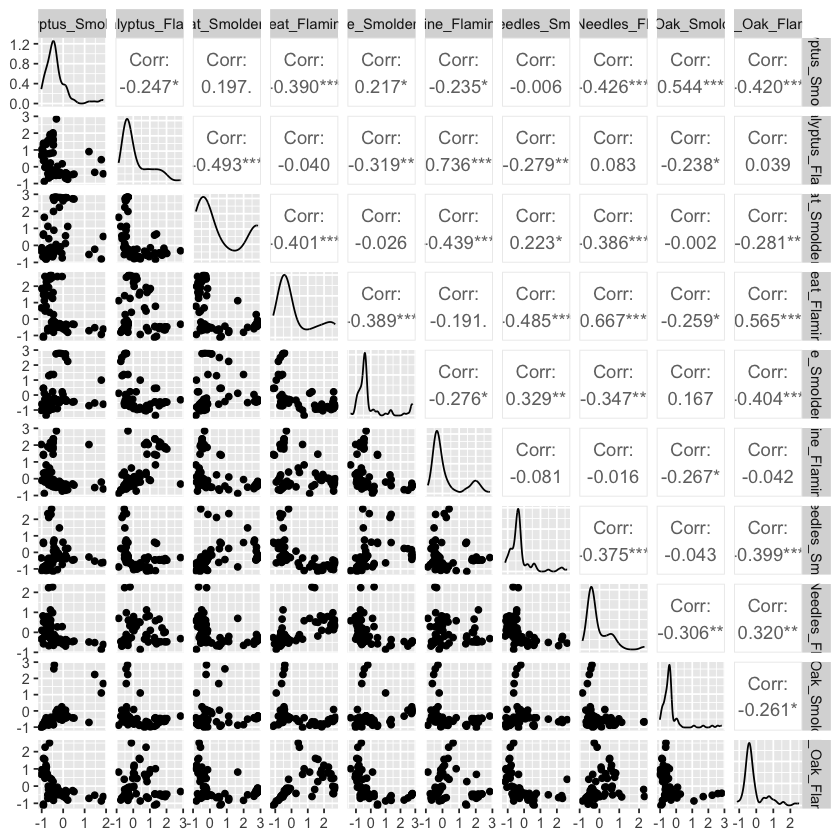

In [14]:
# Using ggpairs to visualize data; note that we need to supply the data 
# specifically as a dataframe (hence the 'data.frame' function)
ggpairs(data.frame(ScaledData))

For more information on GGally see its associated [RDocumentation](https://www.rdocumentation.org/packages/GGally/versions/1.5.0) and [example helpful tutorial](http://www.sthda.com/english/wiki/ggally-r-package-extension-to-ggplot2-for-correlation-matrix-and-survival-plots-r-software-and-data-visualization).


## Boxplot Visualizations

As demonstrated in the previous module on identifying and visualizing data trends, boxplots have utility towards visualizing potential differences between data categories or groupings. Boxplots are very easy to make and still provide informative visualizations for between group comparisons.

Here, we will generate an example boxplot visualization using `ggplot`

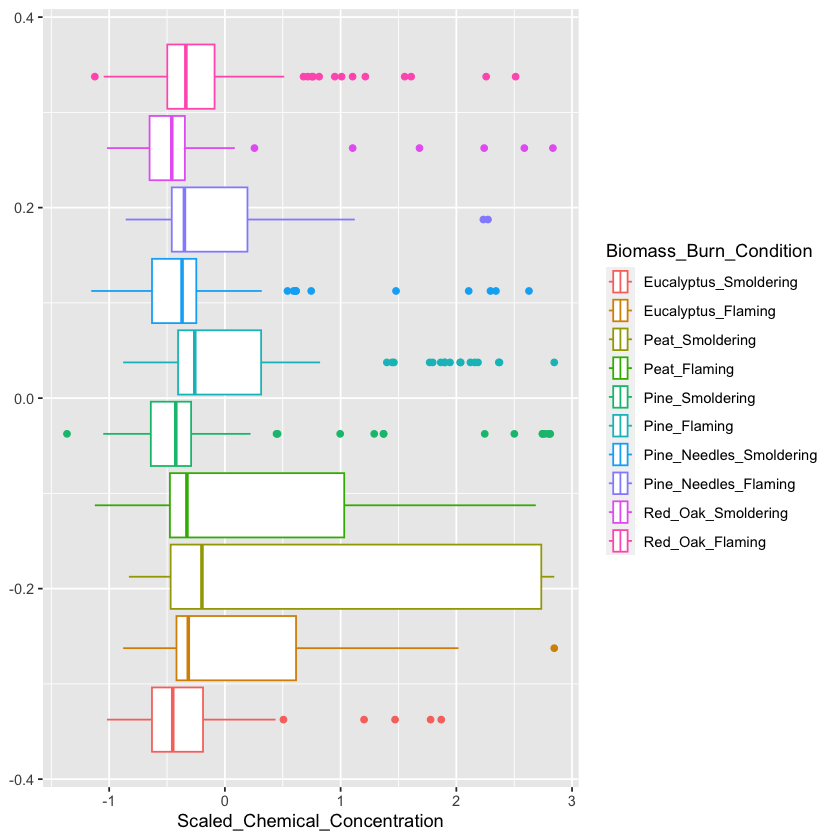

In [15]:
ggplot(ScaledData.melt, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_boxplot()

## Correlation Plot Visualizations

Correlation plots are used to display correlations among variables in a dataset. There are many methods that can be used to generate correlation plot visualizations. Here, we demonstrate two different approaches:

First, we demonstrate further utility of the GGally package towards the generation of correlation plots through the `ggcorr` function:

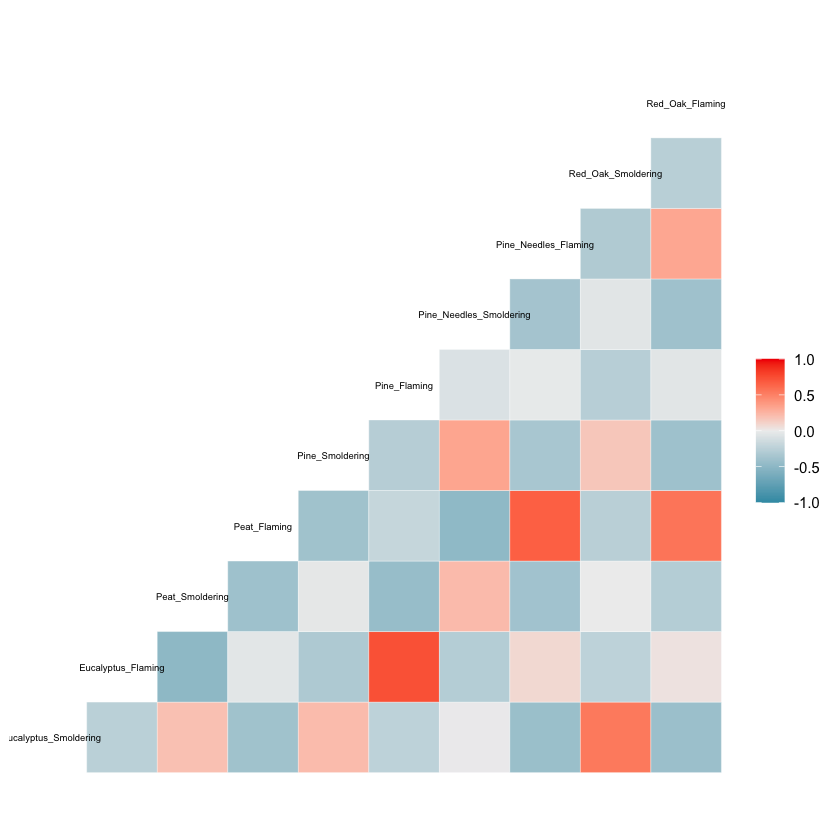

In [16]:
# Note that we need to supply the data specifically as a dataframe (hence the 'data.frame' function)
ggcorr(data.frame(ScaledData), size = 2)

Second, we demonstrate a different function to produce correlation plot visualizations; namely, the `corrplot` function. For the function `corrplot` to work, it needs to be supplied a correlation matrix as the input data, which is demonstrated below.

Example using the `corrplot` function to visualize statistical correlations between biomass burn conditions:

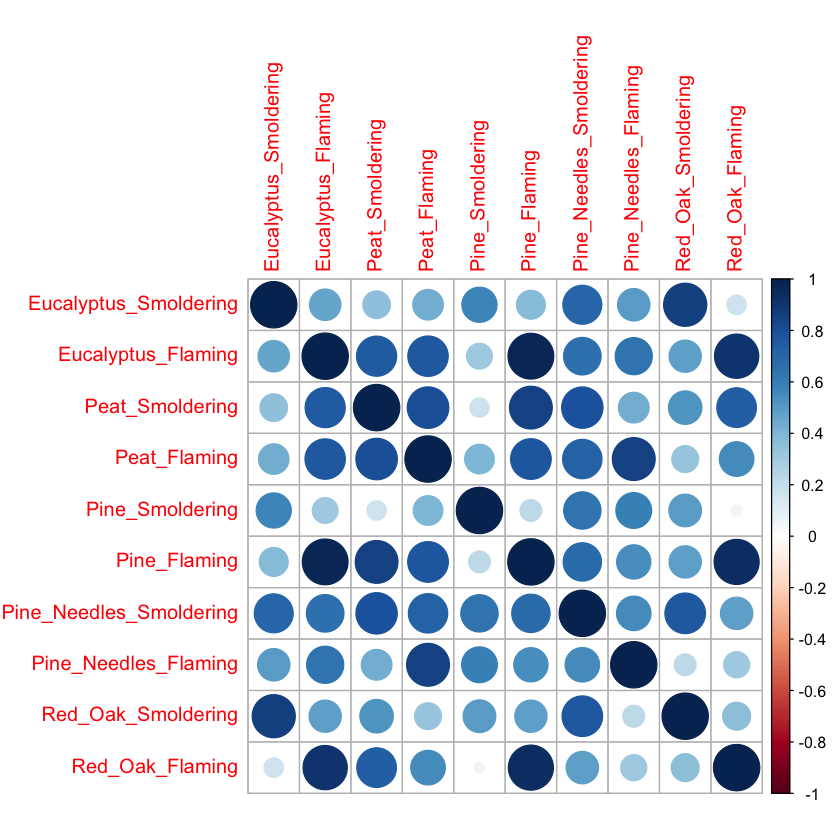

In [17]:
# Need to supply corrplot with a correlation matrix, here, using the 'cor' function
corrplot(cor(SmokeData2))